## Wine Review Analysis
### Author: Ryan Berns
---

#### Load dataset and required packages

In [26]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
import numpy as np
import sklearn as sk
import sys
import statsmodels
from ggplot import ggplot
from ggplot import *
print(sys.version)

/anaconda2/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/anaconda2/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


2.7.14 |Anaconda custom (64-bit)| (default, Oct  5 2017, 02:28:52) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
base = pd.read_csv('winemag-data-130k-v2.csv')

In [3]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


### Summary Statistics

In [4]:
base.describe(include = 'all')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129908,129971,92506,129971.000000,120975.000000,129908,108724,50511,103727,98758,129971,129970,129971
unique,43,119955,37976,NaN,NaN,425,1229,17,19,15,118840,707,16757
top,US,"Seductively tart in lemon pith, cranberry and ...",Reserve,NaN,NaN,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,2009,NaN,NaN,36247,4480,11065,25514,25514,11,13272,222
mean,NaN,NaN,NaN,88.447138,35.363389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.039730,41.022218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
base['variety'].value_counts().head(30)

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
Riesling                       5189
Sauvignon Blanc                4967
Syrah                          4142
Rosé                           3564
Merlot                         3102
Nebbiolo                       2804
Zinfandel                      2714
Sangiovese                     2707
Malbec                         2652
Portuguese Red                 2466
White Blend                    2360
Sparkling Blend                2153
Tempranillo                    1810
Rhône-style Red Blend          1471
Pinot Gris                     1455
Champagne Blend                1396
Cabernet Franc                 1353
Grüner Veltliner               1345
Portuguese White               1159
Bordeaux-style White Blend     1066
Pinot Grigio                   1052
Gamay                          1025
Gewürztraminer              

##### Top 10 Countries

In [6]:
topCountryL = base['country'].value_counts(ascending=False).reset_index().head(10)['index'].tolist()
topCountry = base[(base['country'].isin(topCountryL))]
base['country'].value_counts(ascending=False).head(15)

US              54504
France          22093
Italy           19540
Spain            6645
Portugal         5691
Chile            4472
Argentina        3800
Austria          3345
Australia        2329
Germany          2165
New Zealand      1419
South Africa     1401
Israel            505
Greece            466
Canada            257
Name: country, dtype: int64

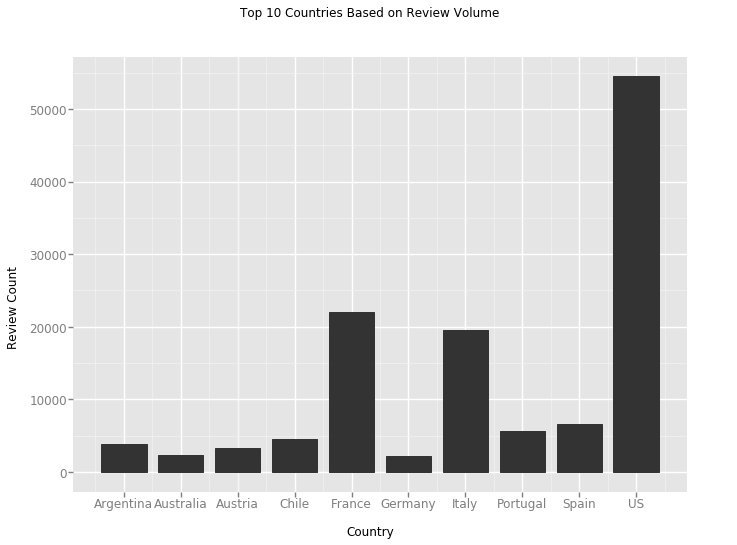

<ggplot: (283129225)>

In [7]:
mpl.rcParams["figure.figsize"] = "15, 8"
ggplot(aes(x='factor(country)'), data=topCountry) + \
     geom_bar() + \
     xlab('Country') +\
     ylab('Review Count') +\
     ggtitle('Top 10 Countries Based on Review Volume')

#### Top Varieties

In [10]:
topVarietyL = base['variety'].value_counts(ascending=False).reset_index().head(10)['index'].tolist()
topVariety = base[(base['variety'].isin(topVarietyL))]
base['variety'].value_counts(ascending=False).head(15)

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Nebbiolo                     2804
Zinfandel                    2714
Sangiovese                   2707
Malbec                       2652
Portuguese Red               2466
Name: variety, dtype: int64

In [11]:
mpl.rcParams["figure.figsize"] = "30, 8"
ggplot(aes(x='factor(variety)'), data=topVariety) + \
     geom_bar() + \
     xlab('Variety') +\
     ylab('Review Count') +\
     ggtitle('Top 10 Varieties Based on Review Volume')

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 3: ordinal not in range(128)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 3: ordinal not in range(128)

In [12]:
baseUS = base[(base['country']=="US")]
top15States = baseUS['province'].value_counts(ascending=False).reset_index().head(10)['index'].tolist()

In [13]:
basUSTop15 = baseUS[(baseUS['province'].isin(top15States))]

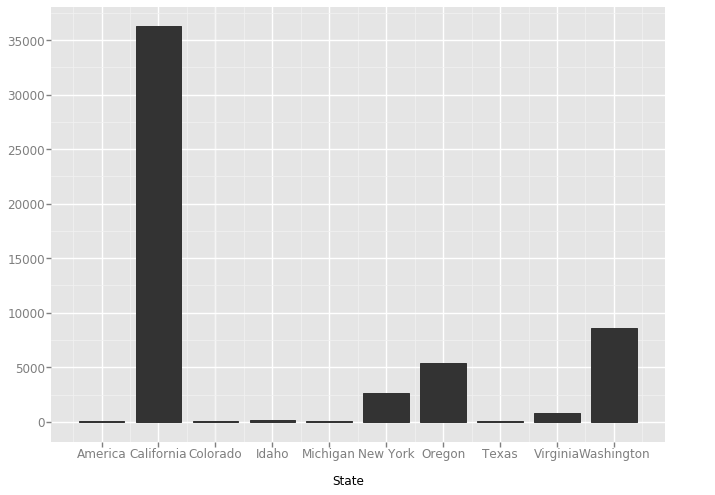

<ggplot: (290962377)>

In [14]:
mpl.rcParams["figure.figsize"] = "15, 8"
ggplot(aes(x='factor(province)'), data=basUSTop15) + \
     geom_bar() + \
     xlab("State")
#      theme_xkcd()

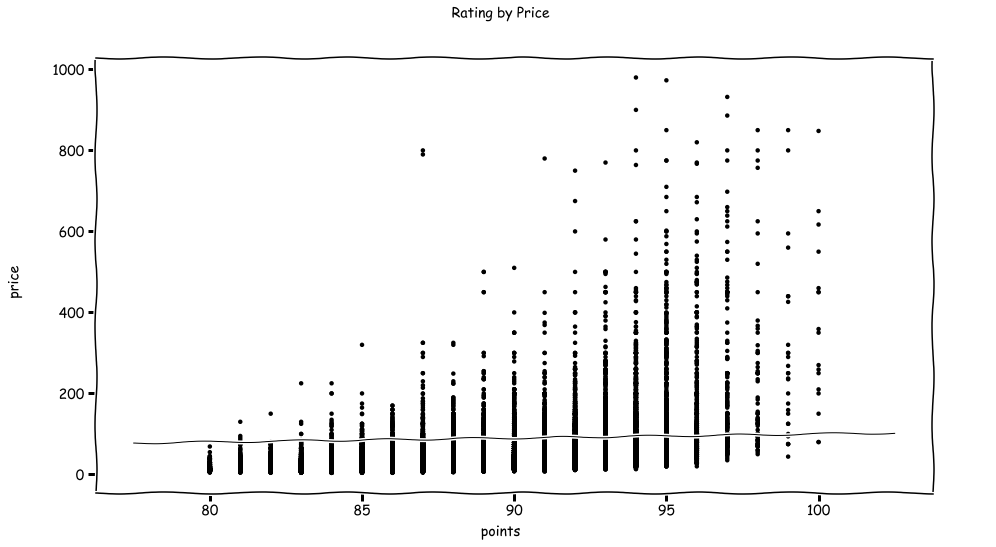

<ggplot: (295535341)>

In [15]:
baseP = base[(base['price'] < 1000)]
ggplot(baseP, aes('points', 'price')) + \
  geom_point(colour='steelblue') +\
    ggtitle('Rating by Price') +\
    geom_abline() +\
    theme_xkcd()

---
### Text Analysis

In [16]:
import nltk
from nltk import FreqDist

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(min_df=.0025, max_df=.1, stop_words='english')
tvec_weights = tvec.fit_transform(base['description'].dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(10)

,term,weight
467,fruits,0.019302
1089,sweet,0.018744
631,light,0.018511
286,crisp,0.018417
76,apple,0.018295
1117,texture,0.017567
139,blackberry,0.017137
1204,white,0.017094
233,citrus,0.016555
758,offers,0.016508


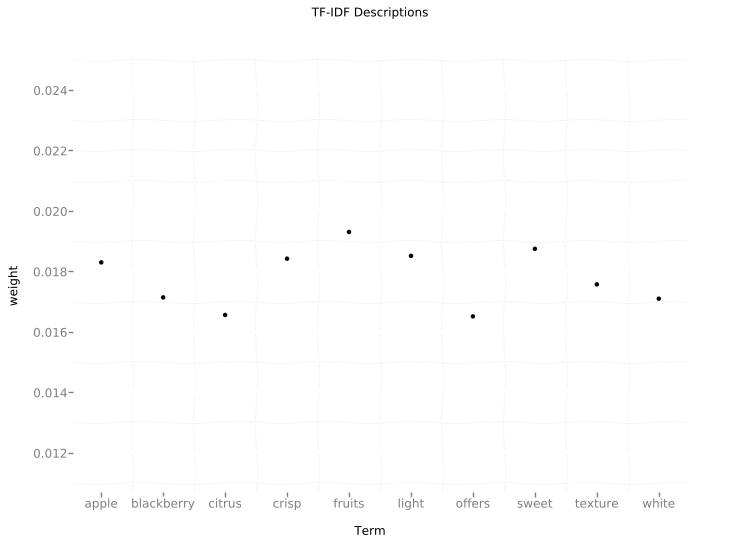

<ggplot: (306446913)>

In [18]:
mpl.rcParams["figure.figsize"] = "10, 4"
test = weights_df.sort_values(by='weight', ascending=False).reset_index().head(10)
test.dtypes
ggplot(aes('factor(term)','weight'), data=test) +\
    geom_point() +\
    theme_bw() +\
    xlab('Term') +\
    ggtitle("TF-IDF Descriptions")

In [19]:
raw1 = base['description'].to_string()
raw = raw1.replace('\n',' ') 
tokens = nltk.word_tokenize(raw)
type(tokens)

list

In [20]:
#change all tokens into lower case 
words1 = [w.lower() for w in tokens]   #list comprehension 

#only keep text words, no numbers 
words2 = [w for w in words1 if w.isalpha()]

In [21]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english') #use the NLTK stopwords
words_nostopwords = [w for w in words2 if w not in stopwords]

In [22]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_words = []
for x in words_nostopwords:
    stemmed_words.append(ps.stem(x))

In [23]:
#generate a frequency dictionary for all tokens 
freq_nostw = FreqDist(stemmed_words)

#sort the frequency list in decending order
sorted_freq_nostw = sorted(freq_nostw.items(),key = lambda k:k[1], reverse = True)
for x in sorted_freq_nostw[0:10]:
    print(x[0],'\t',x[1])

(u'wine', '\t', 26235)
(u'aroma', '\t', 20123)
(u'ripe', '\t', 8009)
(u'blend', '\t', 7406)
(u'fruit', '\t', 6979)
(u'rich', '\t', 5089)
(u'nose', '\t', 5016)
(u'red', '\t', 4274)
(u'dri', '\t', 4198)
(u'note', '\t', 4015)


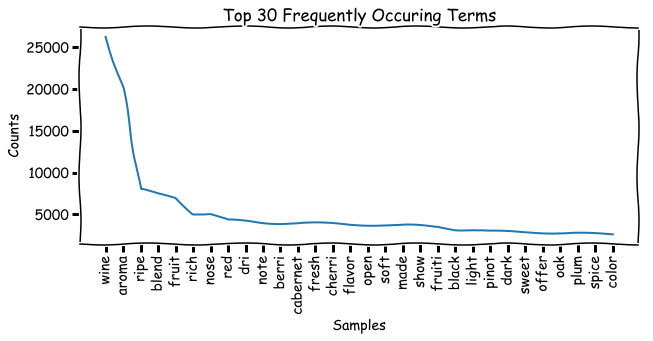

In [24]:
freq_nostw.plot(30,title="Top 30 Frequently Occuring Terms")

In [25]:
test = words2[0:5]
list(filter(lambda a: a != 'tropical', test))

[u'aromas', u'include', u'fruit', u'broom']

In [26]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
def word_counter(df,column,value):
    df2 = df[(df[column]==value)]
    valueNew = value.lower()
    raw1 = df2['description'].to_string()
    raw = raw1.replace('\n',' ') 
    tokens = nltk.word_tokenize(raw)
    type(tokens)
    #change all tokens into lower case 
    words1 = [w.lower() for w in tokens]   #list comprehension 
    #only keep text words, no numbers 
    words2 = [w for w in words1 if w.isalpha()]
    words3 = list(filter(lambda a: a != valueNew, words2))
    words4 = list(filter(lambda a: a != 'wine', words3))
    stopwords2 = stopwords.words('english') #use the NLTK stopwords
    words_nostopwords = [w for w in words4 if w not in stopwords2]
    ps = PorterStemmer()
    stemmed_words = []
    for x in words_nostopwords:
        stemmed_words.append(ps.stem(x))
    freq_nostw = FreqDist(stemmed_words)
    #sort the frequency list in decending order
    sorted_freq_nostw = sorted(freq_nostw.items(),key = lambda k:k[1], reverse = True)
    for x in sorted_freq_nostw[0:20]:
        print(x[0],'\t',x[1])
    freq_nostw.plot(30,title="Top 30 Frequently Occuring Terms")

(u'aroma', '\t', 478)
(u'cherri', '\t', 242)
(u'fruit', '\t', 175)
(u'dri', '\t', 173)
(u'soft', '\t', 158)
(u'flavor', '\t', 156)
(u'red', '\t', 144)
(u'plum', '\t', 143)
(u'ripe', '\t', 139)
(u'black', '\t', 138)
(u'rich', '\t', 113)
(u'note', '\t', 113)
(u'nose', '\t', 108)
(u'good', '\t', 101)
(u'dark', '\t', 97)
(u'show', '\t', 91)
(u'berri', '\t', 91)
(u'spice', '\t', 88)
(u'sweet', '\t', 86)
(u'oak', '\t', 84)


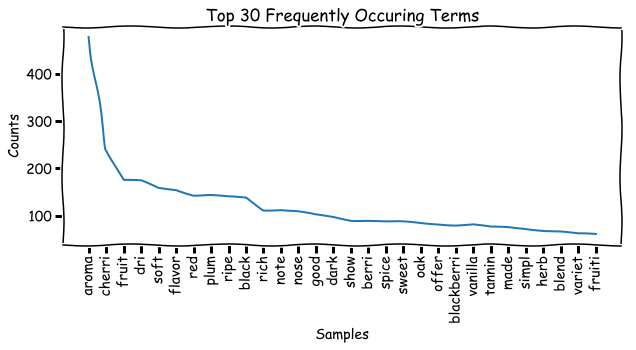

In [27]:
word_counter(base,'variety','Merlot')

(u'ripe', '\t', 2782)
(u'rich', '\t', 1736)
(u'fruiti', '\t', 1692)
(u'fruit', '\t', 1666)
(u'soft', '\t', 1390)
(u'fresh', '\t', 1050)
(u'full', '\t', 1001)
(u'crisp', '\t', 956)
(u'structur', '\t', 928)
(u'tannin', '\t', 899)
(u'blend', '\t', 835)
(u'red', '\t', 759)
(u'light', '\t', 740)
(u'aroma', '\t', 735)
(u'show', '\t', 730)
(u'flavor', '\t', 712)
(u'wood', '\t', 676)
(u'firm', '\t', 673)
(u'attract', '\t', 673)
(u'produc', '\t', 646)


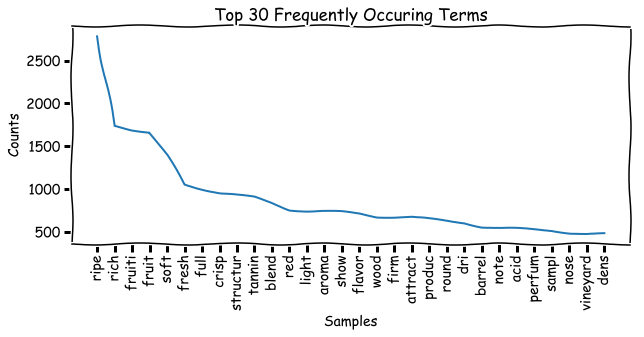

In [28]:
word_counter(base,'country','France')

(u'aroma', '\t', 1685)
(u'blend', '\t', 1234)
(u'cabernet', '\t', 940)
(u'fruit', '\t', 607)
(u'sauvignon', '\t', 571)
(u'merlot', '\t', 493)
(u'note', '\t', 492)
(u'syrah', '\t', 470)
(u'herb', '\t', 466)
(u'spice', '\t', 378)
(u'vineyard', '\t', 359)
(u'come', '\t', 304)
(u'light', '\t', 299)
(u'variet', '\t', 298)
(u'red', '\t', 288)
(u'vanilla', '\t', 277)
(u'offer', '\t', 234)
(u'barrel', '\t', 223)
(u'lead', '\t', 219)
(u'new', '\t', 204)


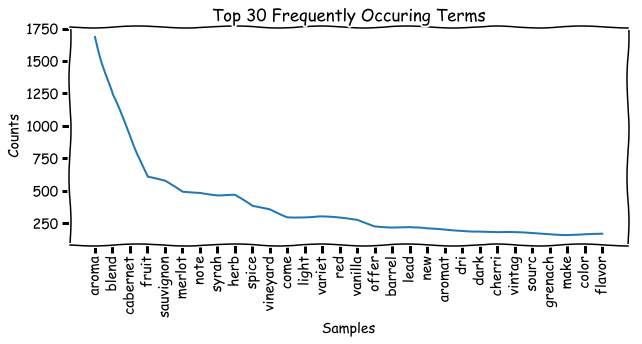

In [29]:
word_counter(base,'province','Washington')

(u'note', '\t', 402)
(u'nose', '\t', 277)
(u'aroma', '\t', 229)
(u'lend', '\t', 218)
(u'cherri', '\t', 217)
(u'fresh', '\t', 217)
(u'appl', '\t', 211)
(u'ripe', '\t', 207)
(u'hint', '\t', 169)
(u'spice', '\t', 155)
(u'smoke', '\t', 146)
(u'whiff', '\t', 146)
(u'savori', '\t', 137)
(u'tone', '\t', 125)
(u'perfum', '\t', 119)
(u'flavor', '\t', 116)
(u'miner', '\t', 116)
(u'lemon', '\t', 114)
(u'blossom', '\t', 111)
(u'black', '\t', 109)


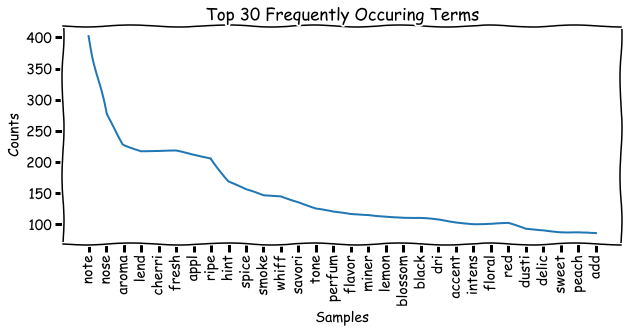

In [30]:
word_counter(base,'province','New York')

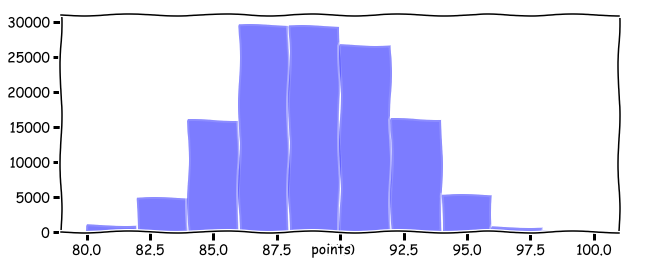

<ggplot: (318021669)>

In [31]:

ggplot(aes(x='points'), data=base) + \
        geom_histogram(alpha = 0.3,fill = 'blue') +\
        theme_xkcd()

In [36]:
import statsmodels.api as sm
values = {'price': np.mean(base['price']), 'points': np.mean(base['points'])}
base = base.fillna(value=values)

X = base["price"]
y = base["points"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                 1.095e+05
Date:                Thu, 19 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:32:50   Log-Likelihood:            -7.2737e+05
No. Observations:              129971   AIC:                         1.455e+06
Df Residuals:                  129970   BIC:                         1.455e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          1.1275      0.003    330.902      0.000       1.121       1.134
==============================================================================
Omnibus:                   286346.504   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5192141705.601
Skew:                         -19.821   Prob(JB):                         0.00
Kurtosis:                     981.362   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Feature Engineering
* Reduce the number of levels by creating an "other" category
* Keeps the top 10 levels and turns all other countries to "Other region"

In [8]:
top10Country = base['country'].value_counts(ascending=False).reset_index().head(10)['index'].tolist()
base['CountryNew'] = np.where(base['country'].isin(top10Country), base['country'], 'Other Region')
base['CountryNew'].value_counts()

US              54504
France          22093
Italy           19540
Spain            6645
Portugal         5691
Other Region     5387
Chile            4472
Argentina        3800
Austria          3345
Australia        2329
Germany          2165
Name: CountryNew, dtype: int64

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
def createDTM(messages):
    vect = TfidfVectorizer(max_features = 50,stop_words = 'english')
    dtm = vect.fit_transform(messages) # create DTM
    
    # create pandas dataframe of DTM
    return pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names()) 

In [10]:
textCols = createDTM(base['description'])
textCols.head()

,acidity,apple,aromas,berry,black,blackberry,blend,bodied,bright,cabernet,...,ripe,shows,soft,spice,sweet,tannins,texture,vanilla,white,wine
0,0.357546,0.513303,0.336527,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.246356,0.000000,0.000000,0.329396,0.0,0.0,0.0,0.0,0.0,0.0,...,0.276145,0.0,0.0,0.0,0.0,0.260073,0.0,0.0,0.0,0.178946
2,0.345965,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.251299
3,0.000000,0.000000,0.358267,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.420003


In [11]:
fullData = base.join(textCols)
fullData.info()
colsToDrop = ['country','description','designation','province','region_1','region_2','taster_name','taster_twitter_handle','title','winery','variety']
fullData = fullData.drop(colsToDrop, axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 64 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    129971 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
CountryNew               129971 non-null object
acidity                  129971 non-null float64
apple                    129971 non-null float64
aromas                   129971 non-null float64
berry                    129971 non-null float64
black                   

In [12]:
features = pd.get_dummies(data=fullData, columns=['CountryNew'],prefix ='country_')
features.head()

,points,price,acidity,apple,aromas,berry,black,blackberry,blend,bodied,...,country__Australia,country__Austria,country__Chile,country__France,country__Germany,country__Italy,country__Other Region,country__Portugal,country__Spain,country__US
0,87,35.363389,0.357546,0.513303,0.336527,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,87,15.000000,0.246356,0.000000,0.000000,0.329396,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,87,14.000000,0.345965,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,87,13.000000,0.000000,0.000000,0.358267,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,87,65.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
values = {'price': np.mean(features['price']), 'points': np.mean(features['points'])}
features = features.fillna(value=values)

X = features.loc[:,features.columns !='points']
y = features["points"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     968.5
Date:                Fri, 13 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:58:00   Log-Likelihood:            -3.0456e+05
No. Observations:              129971   AIC:                         6.092e+05
Df Residuals:                  129909   BIC:                         6.098e+05
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
price                     0.0255      0.000    139.319      0.000       0.025       0.026
acidity                   1.0910      0.054     20.161      0.000       0.985       1.197
apple                     1.3161      0.057     23.080      0.000       1.204       1.428
aromas                    0.4513      0.063      7.172      0.000       0.328       0.575
berry                     1.0874      0.059     18.563      0.000       0.973       1.202
black                     2.3898      0.052     45.656      0.000       2.287       2.492
blackberry                1.5973      0.060     26.805      0.000       1.480       1.714
blend                     0.8994      0.061     14.842      0.000       0.781       1.018
bodied                    0.7607      0.060     12.779      0.000       0.644       0.877
bright                    1.1822      0.062     19.037      0.000       1.060       1.304
cabernet                  1.3817      0.060     23.071      0.000       1.264       1.499
cherry                    0.6317      0.055     11.458      0.000       0.524       0.740
chocolate                 1.9266      0.066     28.979      0.000       1.796       2.057
citrus                    1.1808      0.058     20.293      0.000       1.067       1.295
crisp                     0.3187      0.059      5.375      0.000       0.202       0.435
dark                      2.2787      0.060     37.861      0.000       2.161       2.397
drink                     2.0429      0.057     35.666      0.000       1.931       2.155
dry                       0.0257      0.053      0.484      0.628      -0.078       0.130
finish                    1.0680      0.057     18.813      0.000       0.957       1.179
firm                      2.2810      0.067     33.904      0.000       2.149       2.413
flavors                  -0.4670      0.060     -7.845      0.000      -0.584      -0.350
fresh                     1.1615      0.055     21.025      0.000       1.053       1.270
fruit                     1.2831      0.049     26.398      0.000       1.188       1.378
fruits                    1.5091      0.064     23.729      0.000       1.384       1.634
fruity                   -0.6865      0.063    -10.838      0.000      -0.811      -0.562
good                      0.2667      0.061      4.406      0.000       0.148       0.385
green                    -0.3994      0.061     -6.574      0.000      -0.519      -0.280
juicy                     1.6438      0.066     25.036      0.000       1.515       1.772
lemon                     1.8643      0.060     30.915      0.000       1.746       1.982
light                    -0.4426      0.056     -7.866      0.000      -0.553      -0.332
nose                      0.7674      0.060     12.748      0.000       0.649       0.885
notes                  

#### Review Regression after adding country
* R squared reduced significantly
* p-values are significant for every column

---
### Random Forest Classifier

In [14]:
labels = np.array(features['points'])
features= features.drop('points', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [15]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [16]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

('Training Features Shape:', (97478, 62))
('Training Labels Shape:', (97478,))
('Testing Features Shape:', (32493, 62))
('Testing Labels Shape:', (32493,))


In [23]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 50, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X = train_features
y = train_labels
X, y = make_classification(n_samples=1000, n_features=62, n_informative=2, n_redundant=0,random_state=0, shuffle=False)
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X, y)
predict_labels = rf.predict(test_features)

In [21]:
from sklearn.linear_model import LogisticRegression
logit1=LogisticRegression()
logi = logit1.fit(train_features,train_labels)
predict_labels = logi.predict(test_features)

In [93]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'points.')

('Mean Absolute Error:', 87.45, 'points.')


In [94]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

('Accuracy:', 100.0, '%.')


In [43]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: price                Importance: 0.37
Variable: Unnamed: 0           Importance: 0.05
Variable: flavors              Importance: 0.03
Variable: wine                 Importance: 0.03
Variable: acidity              Importance: 0.02
Variable: aromas               Importance: 0.02
Variable: drink                Importance: 0.02
Variable: finish               Importance: 0.02
Variable: fruit                Importance: 0.02
Variable: palate               Importance: 0.02
Variable: rich                 Importance: 0.02
Variable: ripe                 Importance: 0.02
Variable: soft                 Importance: 0.02
Variable: sweet                Importance: 0.02
Variable: apple                Importance: 0.01
Variable: berry                Importance: 0.01
Variable: black                Importance: 0.01
Variable: blackberry           Importance: 0.01
Variable: blend                Importance: 0.01
Variable: bodied               Importance: 0.01
Variable: bright               Importanc

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [18]:
# six classification measures
import numpy as np 
import math

def compute_measure(predicted_label,true_label):
    t_idx = (predicted_label == true_label)# truely predicted
    f_idx = np.logical_not(t_idx)# falsely predicted
    
    p_idx = (true_label > 0) #positive targets
    n_idx = np.logical_not(p_idx)#negative targets
    tp = np.sum(np.logical_and(t_idx,p_idx))# TP
    tn = np.sum(np.logical_and(t_idx,n_idx))# TN
    # false positive:original negative but classified as postive
    #false negative:original positive but classified as negative
    fp = np.sum(n_idx)-tn
    fn = np.sum(p_idx)-tp
    tp_fp_tn_list = []
    tp_fp_tn_list.append(tp)
    tp_fp_tn_list.append(fp)
    tp_fp_tn_list.append(tn)
    tp_fp_tn_list.append(fn)
    tp_fp_tn_list = np.array(tp_fp_tn_list)
    tp = tp_fp_tn_list[0]
    fp = tp_fp_tn_list[1]
    tn = tp_fp_tn_list[2]
    fn = tp_fp_tn_list[3]
    
    with np.errstate(divide = 'ignore'):
        sen = (1.0*tp)/(tp+fn)
   # with np.errstate(divide = 'ignore'):
        #spc = (1.0*tn)/(tn+fp)
    with np.errstate(divide = 'ignore'):
        ppr = float(1.0*tp)/(float(tp)+float(fp))
    with np.errstate(divide = 'ignore'):
        npr = (1.0*tn)/(tn+fn)
    
        F1_score = float(2*tp)/(2*tp+fp+fn)
        acc = (tp+tn)*1.0/(tp+fp+tn+fn)
        #d = math.log((1+acc),2.0)+math.log((1+(sen+0)/2),2.0)
        
        ans=[]
        ans.append(acc)
        ans.append(sen)
        #ans.append(spc)
        ans.append(ppr)
        ans.append(npr)
        ans.append(F1_score)
        #ans.append(d)
    return ans

In [25]:
predict_labels = rf.predict(test_features)

In [26]:
ans = compute_measure(predict_labels,test_labels)
print('This is the accuracy of Random Forest model:  '+ str(ans[0]))
print('This is the sensitivy of Random Forest model:  '+ str(ans[1]))
#print('This is the specificity of KNN model: '+ str(ans[2]))
print('This is the positive predictive ratios of Random Forest model: '+ str(ans[2]))
print('This is the negative predictive ratios of Random Forest model: '+ str(ans[3]))
print('This is the F1 scores of Random Forest model: '+ str(ans[4]))
#print('This is the Diagnostic index of the KNN model: '+ str(ans[5]))

This is the accuracy of Random Forest model:  0.004216292739974764
This is the sensitivy of Random Forest model:  0.00421629273997
This is the positive predictive ratios of Random Forest model: 1.0
This is the negative predictive ratios of Random Forest model: 0.0
This is the F1 scores of Random Forest model: 0.00839718050873


Feature ranking:
1. feature 0 (0.099356)
2. feature 50 (0.045798)
3. feature 20 (0.041957)
4. feature 22 (0.038297)
5. feature 1 (0.030320)
6. feature 18 (0.029878)
7. feature 34 (0.027692)
8. feature 3 (0.027011)
9. feature 16 (0.025146)
10. feature 46 (0.024021)
11. feature 11 (0.023802)
12. feature 41 (0.023350)
13. feature 39 (0.020587)
14. feature 31 (0.019932)
15. feature 44 (0.019010)
16. feature 5 (0.018481)
17. feature 32 (0.018296)
18. feature 17 (0.018225)
19. feature 21 (0.017246)
20. feature 30 (0.017037)
21. feature 7 (0.016131)
22. feature 4 (0.015690)
23. feature 40 (0.015646)
24. feature 47 (0.014923)
25. feature 42 (0.014850)
26. feature 45 (0.014403)
27. feature 37 (0.014104)
28. feature 43 (0.014022)
29. feature 13 (0.013837)
30. feature 6 (0.013348)
31. feature 23 (0.013244)
32. feature 48 (0.013183)
33. feature 49 (0.013183)
34. feature 2 (0.013120)
35. feature 8 (0.013012)
36. feature 33 (0.012944)
37. feature 14 (0.012874)
38. feature 29 (0.012600)
39. feature 9

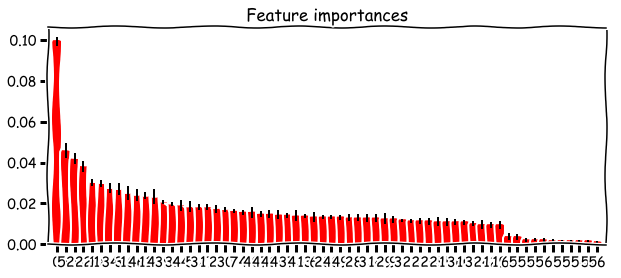

In [109]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

X = train_features
y = train_labels

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Topic Modeling

1 preprocessing

In [1]:
import pandas as pd  
import gensim
from gensim import corpora,models

In [2]:
base = pd.read_csv('winemag-data-130k-v2.csv')
#convert all description text into list format
descriptions = base['description'].tolist()

In [3]:
#remove '\r' and punctuations 
import string

new_des = []
for description in descriptions: 
    for ch in description:
        if ch in string.punctuation:
            description = description.replace(ch,'') #replace punctuation with nothing
        if ch == '\r':
            description = description.replace(ch,' ') #replace \r with space
    new_des.append(description) 

In [8]:
new_des

['Aromas include tropical fruit broom brimstone and dried herb The palate isnt overly expressive offering unripened apple citrus and dried sage alongside brisk acidity',
 'This is ripe and fruity a wine that is smooth while still structured Firm tannins are filled out with juicy red berry fruits and freshened with acidity Its  already drinkable although it will certainly be better from 2016',
 'Tart and snappy the flavors of lime flesh and rind dominate Some green pineapple pokes through with crisp acidity underscoring the flavors The wine was all stainlesssteel fermented',
 'Pineapple rind lemon pith and orange blossom start off the aromas The palate is a bit more opulent with notes of honeydrizzled guava and mango giving way to a slightly astringent semidry finish',
 'Much like the regular bottling from 2012 this comes across as rather rough and tannic with rustic earthy herbal characteristics Nonetheless if you think of it as a pleasantly unfussy country wine its a good companion to

In [4]:
#remove stop words, to lowercase and tokenize
from nltk.corpus import stopwords
mystopwords = stopwords.words('english')

tokens_list = [[word for word in des.lower().split(' ') if word not in mystopwords and word.isalpha()]
         for des in new_des]

#remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)

for tokens in tokens_list:
    for token in tokens:
        frequency[token] += 1
        
tokens_list = [[token for token in tokens if frequency[token]>1]
              for tokens in tokens_list]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  


In [5]:
print(tokens_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


2  Generate Term Document Matrix

In [6]:
# generate token dictionary class
dictionary = corpora.Dictionary(tokens_list) 
print(dictionary)

Dictionary(23950 unique tokens: [u'insolia', u'chakana', u'woods', u'clotted', u'hanging']...)


In [7]:
# generate a unique token list
sort_token = sorted(dictionary.items(),key=lambda k:k[0], reverse = False)
unique_token = [token for (ID,token) in sort_token]

In [8]:
# build a corpus
corpus = [dictionary.doc2bow(tokens) for tokens in tokens_list]

print(corpus) 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [9]:
import numpy as np
matrix = gensim.matutils.corpus2dense(corpus,num_terms=len(dictionary),dtype = 'int')
matrix = matrix.T #transpose the matrix 

#convert the numpy matrix into pandas data frame
matrix_df = pd.DataFrame(matrix, columns=unique_token)

In [9]:
#write matrix dataframe into csv
matrix_df.to_csv('Term_Document_matrix.csv')

3(a) LDA Model

In [10]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=20) #fit lda model

lda.print_topics(20) #V matrix, topic matrix

[(0,
  u'0.051*"black" + 0.041*"cherry" + 0.039*"tannins" + 0.034*"palate" + 0.034*"aromas" + 0.019*"spice" + 0.018*"pepper" + 0.017*"plum" + 0.016*"leather" + 0.016*"drink"'),
 (1,
  u'0.043*"fruit" + 0.035*"flavors" + 0.027*"oak" + 0.025*"wine" + 0.020*"aromas" + 0.019*"finish" + 0.017*"cherry" + 0.014*"notes" + 0.014*"new" + 0.012*"spice"'),
 (2,
  u'0.015*"pale" + 0.014*"perfectly" + 0.013*"producers" + 0.013*"within" + 0.013*"one" + 0.013*"burst" + 0.013*"stony" + 0.011*"tartness" + 0.011*"color" + 0.011*"hit"'),
 (3,
  u'0.072*"wine" + 0.046*"acidity" + 0.036*"crisp" + 0.030*"drink" + 0.030*"fruity" + 0.027*"fresh" + 0.026*"light" + 0.020*"soft" + 0.020*"flavors" + 0.020*"texture"'),
 (4,
  u'0.035*"sweet" + 0.029*"like" + 0.023*"wine" + 0.016*"flavors" + 0.014*"sugar" + 0.013*"color" + 0.013*"honey" + 0.012*"tastes" + 0.010*"sweetness" + 0.010*"brown"'),
 (5,
  u'0.047*"flavors" + 0.043*"finish" + 0.040*"aromas" + 0.026*"berry" + 0.023*"palate" + 0.022*"plum" + 0.016*"herbal" + 

In [17]:
# Generate Matrix for LDA model
corpus_lda = lda[corpus] #transform lda model

#convert corpus_lda to numpy matrix
matrix_lda = gensim.matutils.corpus2dense(corpus_lda,num_terms=20).T

#write U_matrix into pandas dataframe and output
matrix_lda_df = pd.DataFrame(matrix_lda)

#matrix_lda_df.to_csv('matrix_lda.csv')

In [18]:
matrix_lda_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.000000,0.000000,0.000000,0.127671,0.000000,0.234202,0.000000,0.000000,0.000000,0.000000,0.444061,0.000000,0.000000,0.000000,0.000000,0.108439,0.051537,0.000000,0.000000
1,0.072415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.884727,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.071076,0.820981,0.000000,0.000000,0.060721,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.055073,0.274192,0.547358,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087013,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.201654,0.000000,0.000000,0.192202,0.000000,0.000000,0.171025,0.000000,0.000000,0.000000,0.043690,0.000000,0.000000,0.000000,0.051415,0.050697,0.000000,0.263317
5,0.118795,0.088166,0.000000,0.000000,0.000000,0.538700,0.000000,0.000000,0.000000,0.000000,0.225768,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.808747,0.000000,0.000000,0.000000,0.000000,0.146253,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.186838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.176873,0.000000,0.000000,0.000000,0.000000,0.570905,0.000000,0.000000,0.000000,0.000000
8,0.170152,0.000000,0.000000,0.000000,0.000000,0.000000,0.287122,0.437305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060976
9,0.000000,0.000000,0.000000,0.626547,0.000000,0.000000,0.105302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.215026,0.000000,0.000000,0.000000,0.000000


In [22]:
points = base['points']

Feature ranking:
1. lda_topic 6 (0.068991)
2. lda_topic 3 (0.060707)
3. lda_topic 15 (0.059061)
4. lda_topic 0 (0.055048)
5. lda_topic 5 (0.053868)
6. lda_topic 11 (0.053636)
7. lda_topic 8 (0.051980)
8. lda_topic 1 (0.049420)
9. lda_topic 10 (0.048666)
10. lda_topic 19 (0.048237)
11. lda_topic 13 (0.048156)
12. lda_topic 12 (0.047369)
13. lda_topic 18 (0.046742)
14. lda_topic 4 (0.046542)
15. lda_topic 9 (0.046322)
16. lda_topic 16 (0.044947)
17. lda_topic 7 (0.044142)
18. lda_topic 17 (0.042712)
19. lda_topic 2 (0.042192)
20. lda_topic 14 (0.041262)


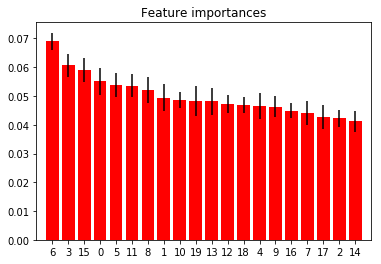

In [34]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

X = matrix_lda_df
y = points

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. lda_topic %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [60]:
p2 = pd.DataFrame(base[['points', 'price']].copy())
p2['price'] = p2['price'].fillna((p2['price'].mean()))
p2['points'] = p2['points'].fillna((p2['points'].mean()))

lda_df = pd.concat([p2,matrix_lda_df],axis=1)

In [61]:
y = lda_df['points']
X = lda_df.loc[:,lda_df.columns !='points']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.819e+06
Date:                Thu, 19 Apr 2018   Prob (F-statistic):               0.00
Time:                        22:07:13   Log-Likelihood:            -2.8813e+05
No. Observations:              129971   AIC:                         5.763e+05
Df Residuals:                  129950   BIC:                         5.765e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          0.0202      0.000    124.656      0.000       0.020       0.021
0             90.7139      0.038   2373.449      0.000      90.639      90.789
1             91.2762      0.048   1882.518      0.000      91.181      91.371
2             89.7531      0.198    453.707      0.000      89.365      90.141
3             89.7731      0.038   2362.635      0.000      89.699      89.848
4             88.4338      0.107    828.044      0.000      88.224      88.643
5             87.6905      0.033   2624.162      0.000      87.625      87.756
6             90.6700      0.031   2962.443      0.000      90.610      90.730
7             92.0605      0.089   1034.453      0.000      91.886      92.235
8             85.0826      0.066   1293.188      0.000      84.954      85.212
9             92.6929      0.107    866.911      0.000      92.483      92.902
10            89.8710      0.058   1561.159      0.000      89.758      89.984
11            91.5418      0.057   1609.209      0.000      91.430      91.653
12            89.3326      0.124    723.160      0.000      89.090      89.575
13            92.5660      0.056   1655.663      0.000      92.456      92.676
14            89.7529      0.190    472.957      0.000      89.381      90.125
15            92.7791      0.030   3088.798      0.000      92.720      92.838
16            88.6483      0.058   1520.709      0.000      88.534      88.763
17            96.0759      0.079   1223.672      0.000      95.922      96.230
18            88.8022      0.108    819.274      0.000      88.590      89.015
19            92.2298      0.060   1527.000      0.000      92.111      92.348
==============================================================================
Omnibus:                    30709.165   Durbin-Watson:                   0.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           703395.073
Skew:                          -0.592   Prob(JB):                         0.00
Kurtosis:                      14.335   Cond. No.                     1.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

3(b)LSI Model

In [30]:
# Tfidf Transformation 
tfidf = models.TfidfModel(corpus) #fit tfidf model
corpus_tfidf = tfidf[corpus]      #transform tfidf model

In [31]:
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=20)

lsi.print_topics()

[(0,
  u'0.165*"wine" + 0.152*"drink" + 0.152*"acidity" + 0.151*"tannins" + 0.148*"ripe" + 0.143*"black" + 0.142*"fruit" + 0.132*"aromas" + 0.132*"cherry" + 0.128*"flavors"'),
 (1,
  u'-0.191*"cherry" + 0.178*"fruits" + 0.173*"crisp" + -0.173*"black" + 0.168*"wine" + 0.167*"fruity" + 0.159*"acidity" + 0.152*"ready" + -0.145*"alongside" + -0.144*"aromas"'),
 (2,
  u'0.230*"apple" + 0.213*"white" + 0.184*"peach" + 0.180*"citrus" + -0.176*"tannins" + -0.159*"black" + 0.156*"pear" + 0.155*"lemon" + -0.152*"fruits" + 0.133*"palate"'),
 (3,
  u'0.214*"alongside" + -0.180*"cabernet" + -0.150*"oak" + -0.147*"sweet" + -0.142*"flavors" + -0.133*"finish" + 0.130*"offers" + 0.129*"tannins" + 0.129*"juicy" + -0.119*"sauvignon"'),
 (4,
  u'0.357*"cabernet" + 0.255*"sauvignon" + 0.228*"merlot" + 0.218*"fruity" + 0.212*"blend" + 0.202*"light" + 0.189*"soft" + 0.186*"red" + 0.172*"franc" + 0.150*"ready"'),
 (5,
  u'-0.343*"cabernet" + -0.265*"sauvignon" + 0.228*"berry" + -0.196*"merlot" + 0.167*"red" +

In [33]:
# Generate Matrix for LSI model
corpus_lsi = lsi[corpus_tfidf] #transform lda model

#convert corpus_lda to numpy matrix
matrix_lsi = gensim.matutils.corpus2dense(corpus_lsi,num_terms=20).T

#write U_matrix into pandas dataframe and output
matrix_lsi_df = pd.DataFrame(matrix_lsi)
#pd.DataFrame(matrix_lsi).to_csv('matrix_lsi.csv')

Feature ranking:
1. lsi_topic 5 (0.053566)
2. lsi_topic 11 (0.052893)
3. lsi_topic 2 (0.052194)
4. lsi_topic 8 (0.051666)
5. lsi_topic 4 (0.051489)
6. lsi_topic 0 (0.051259)
7. lsi_topic 12 (0.050868)
8. lsi_topic 3 (0.049787)
9. lsi_topic 9 (0.049772)
10. lsi_topic 1 (0.049546)
11. lsi_topic 14 (0.049461)
12. lsi_topic 16 (0.049215)
13. lsi_topic 17 (0.049011)
14. lsi_topic 7 (0.048959)
15. lsi_topic 6 (0.048950)
16. lsi_topic 10 (0.048492)
17. lsi_topic 15 (0.048303)
18. lsi_topic 18 (0.048231)
19. lsi_topic 13 (0.048225)
20. lsi_topic 19 (0.048110)


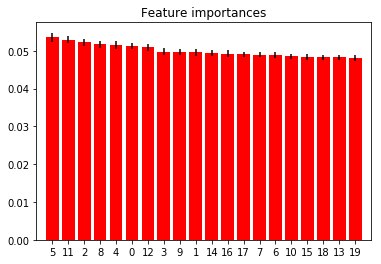

In [35]:
X1 = matrix_lsi_df
y1 = points

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X1, y1)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. lsi_topic %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X1.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X1.shape[1]), indices)
plt.xlim([-1, X1.shape[1]])
plt.show()

In [62]:
lsi_df = pd.concat([p2,matrix_lsi_df],axis=1)
y = lsi_df['points']
X = lsi_df.loc[:,lsi_df.columns !='points']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 9.757e+04
Date:                Thu, 19 Apr 2018   Prob (F-statistic):               0.00
Time:                        22:08:02   Log-Likelihood:            -5.8386e+05
No. Observations:              129971   AIC:                         1.168e+06
Df Residuals:                  129950   BIC:                         1.168e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          0.1422      0.002     91.454      0.000       0.139       0.145
0            569.5498      0.578    985.966      0.000     568.418     570.682
1             10.7322      0.754     14.225      0.000       9.253      12.211
2             93.1248      0.814    114.386      0.000      91.529      94.721
3           -219.4728      0.948   -231.401      0.000    -221.332    -217.614
4            -68.9236      1.072    -64.323      0.000     -71.024     -66.823
5             -1.2784      1.093     -1.169      0.242      -3.422       0.865
6             63.4779      1.152     55.114      0.000      61.221      65.735
7             99.2546      1.200     82.701      0.000      96.902     101.607
8            -52.4145      1.299    -40.352      0.000     -54.960     -49.869
9            -34.8584      1.321    -26.390      0.000     -37.447     -32.269
10           -37.4890      1.338    -28.021      0.000     -40.111     -34.867
11           -27.8800      1.380    -20.202      0.000     -30.585     -25.175
12           -37.2819      1.396    -26.705      0.000     -40.018     -34.546
13            -8.8320      1.409     -6.269      0.000     -11.593      -6.071
14            38.7086      1.456     26.589      0.000      35.855      41.562
15             5.3313      1.447      3.686      0.000       2.496       8.166
16          -109.5799      1.483    -73.866      0.000    -112.488    -106.672
17            39.5306      1.481     26.684      0.000      36.627      42.434
18             6.2683      1.493      4.198      0.000       3.342       9.195
19           -33.7061      1.510    -22.329      0.000     -36.665     -30.748
==============================================================================
Omnibus:                    23819.846   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           178698.666
Skew:                          -0.683   Prob(JB):                         0.00
Kurtosis:                       8.580   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""